# Unidad Lógica de Umbral
La Unidad Lógica de Umbral o TLU Threshold Logical Unit.

La neurona de McCulloch-Pitts es una unidad de cálculo que intenta modelar el comportamiento de una neurona "natural", similares a las que constituyen del cerebro humano. Es es la unidad esencial con la cual se construye una red neuronal artificial.

El objetivo es utilizar una Unidad Logica de Umbral
(TLU) para simular compuertas logicas basicas, combinarlas para resolver problemas mas complejos y visualizar los resultados mediante fronteras de
decision y tablas de verdad.

In [1]:
import numpy as np

In [2]:
#Implementacion del TLU
def TLU(entradas,pesos,umbral):
  salida = np.dot(entradas,pesos) #np.dot se usa para calcular el producto escalar de dos arreglos
  if salida >= umbral:
    return 1
  else:
    return 0

In [3]:
#Simulacion de compuerta logica NOT
def NOT(x1):
  return TLU(x1, -1, -0.5)

In [4]:
#Simulacion de Compuerta Logica AND
def AND(x1, x2):
  return TLU(np.array([x1, x2]), np.array([1, 1]), 1.5)

In [5]:
#Simulacion de Compuerta Logica OR
def OR(x1, x2):
  return TLU(np.array([x1, x2]), np.array([1, 1]), 0.5)

In [6]:
# Tablas de verdad
#Tabla de verdad NOT
print("NOT")
print(f"0 -> {NOT(0)}")
print(f"1 -> {NOT(1)}")
print("\n")

#Tabla de verdad AND
print("AND")
print(f"0 - 0 -> {AND(0,0)}")
print(f"0 - 1 -> {AND(0,1)}")
print(f"1 - 0 -> {AND(1,0)}")
print(f"1 - 1 -> {AND(1,1)}")
print("\n")

#Tabla de verdad NOT
print("OR")
print(f"0 - 0 -> {OR(0,0)}")
print(f"0 - 1 -> {OR(0,1)}")
print(f"1 - 0 -> {OR(1,0)}")
print(f"1 - 1 -> {OR(1,1)}")

NOT
0 -> 1
1 -> 0


AND
0 - 0 -> 0
0 - 1 -> 0
1 - 0 -> 0
1 - 1 -> 1


OR
0 - 0 -> 0
0 - 1 -> 1
1 - 0 -> 1
1 - 1 -> 1


In [7]:
#Resolviendo Problemas con Combinaciones NAND NOR XOR y XNOR

#NADN
def NAND(x1, x2):
  return NOT(AND(x1, x2))

#NOR
def NOR(x1, x2):
  return NOT(OR(x1, x2))

#XOR
def XOR(x1, x2):
  return AND(NAND(x1, x2), OR(x1, x2))

#XNOR
def XNOR(x1, x2):
  return NOT(XOR(x1, x2))

#Tabla de verdad NAND

#Tabla de verdad NAND
print("NAND")
print(f"0 - 0 -> {NAND(0,0)}")
print(f"0 - 1 -> {NAND(0,1)}")
print(f"1 - 0 -> {NAND(1,0)}")
print(f"1 - 1 -> {NAND(1,1)}")
print("\n")

#Tabla de verdad NOR
print("NOR")
print(f"0 - 0 -> {NOR(0,0)}")
print(f"0 - 1 -> {NOR(0,1)}")
print(f"1 - 0 -> {NOR(1,0)}")
print(f"1 - 1 -> {NOR(1,1)}")
print("\n")
#Tabla de verdad XOR
print("XOR")
print(f"0 - 0 -> {XOR(0,0)}")
print(f"0 - 1 -> {XOR(0,1)}")
print(f"1 - 0 -> {XOR(1,0)}")
print(f"1 - 1 -> {XOR(1,1)}")
print("\n")

#Tabla de verdad XNOR
print("XNOR")
print(f"0 - 0 -> {XNOR(0,0)}")
print(f"0 - 1 -> {XNOR(0,1)}")
print(f"1 - 0 -> {XNOR(1,0)}")
print(f"1 - 1 -> {XNOR(1,1)}")

NAND
0 - 0 -> 1
0 - 1 -> 1
1 - 0 -> 1
1 - 1 -> 0


NOR
0 - 0 -> 1
0 - 1 -> 0
1 - 0 -> 0
1 - 1 -> 0


XOR
0 - 0 -> 0
0 - 1 -> 1
1 - 0 -> 1
1 - 1 -> 0


XNOR
0 - 0 -> 1
0 - 1 -> 0
1 - 0 -> 0
1 - 1 -> 1


## Visualizacion de la frontera de decision de las compuertas logicas


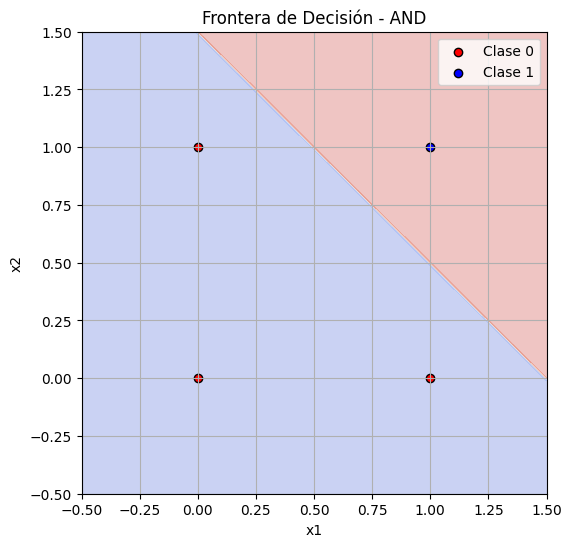

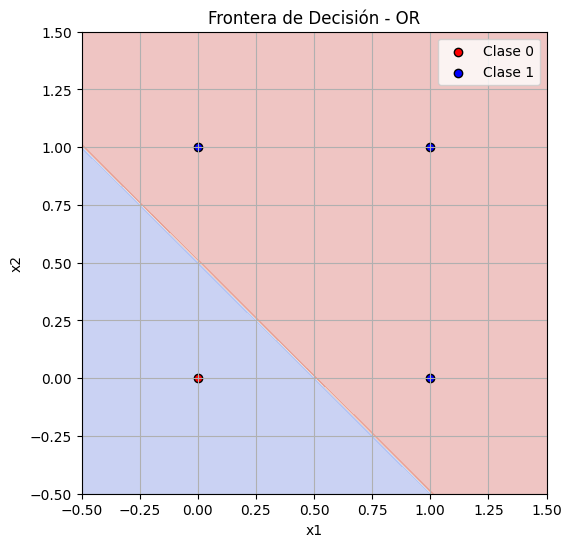

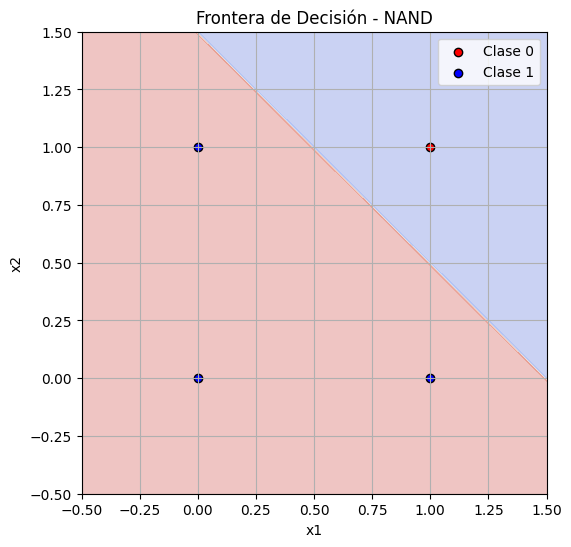

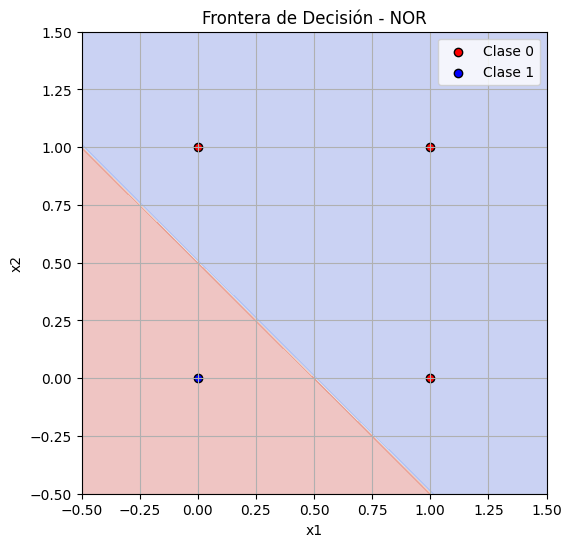

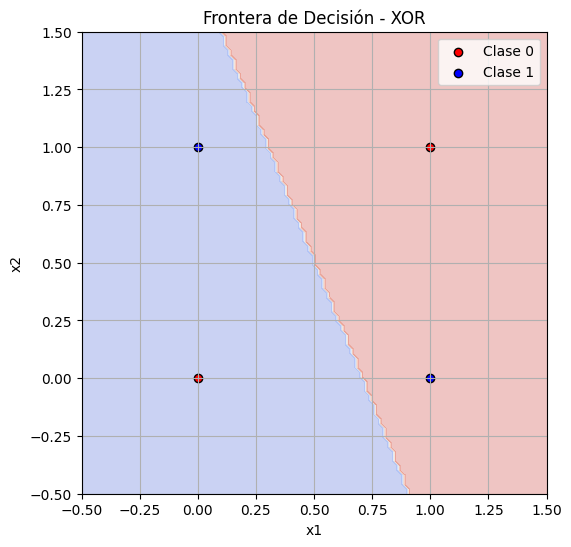

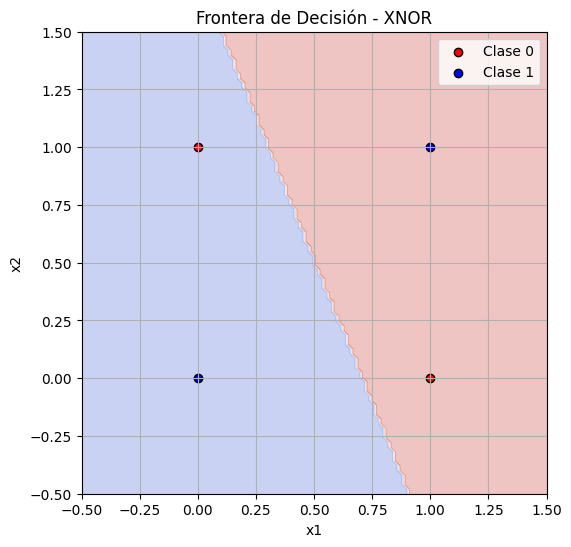

In [8]:
import matplotlib.pyplot as plt

# Función para graficar la frontera de decisión
def plot_decision_boundary(logic_function, weights, bias, title):
    # Generar el conjunto de datos (entradas binarias)
    x1_vals = np.array([0, 0, 1, 1])
    x2_vals = np.array([0, 1, 0, 1])
    y_vals = np.array([logic_function(x1, x2) for x1, x2 in zip(x1_vals, x2_vals)])

    # Crear una malla de puntos
    x1_range = np.linspace(-0.5, 1.5, 100)
    x2_range = np.linspace(-0.5, 1.5, 100)
    X1, X2 = np.meshgrid(x1_range, x2_range)

    # Calcular valores de la frontera de decisión
    Z = np.array([[TLU([x1, x2], weights, bias) for x1 in x1_range] for x2 in x2_range])

    # Graficar
    plt.figure(figsize=(6, 6))
    plt.contourf(X1, X2, Z, alpha=0.3, cmap="coolwarm")  # Frontera de decisión
    plt.scatter(x1_vals[y_vals == 0], x2_vals[y_vals == 0], color='red', label="Clase 0", edgecolors="black")
    plt.scatter(x1_vals[y_vals == 1], x2_vals[y_vals == 1], color='blue', label="Clase 1", edgecolors="black")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(f"Frontera de Decisión - {title}")
    plt.legend()
    plt.grid(True)
    plt.show()

# Graficar fronteras de decisión para cada función lógica
plot_decision_boundary(AND, [1, 1], 1.5, "AND")
plot_decision_boundary(OR, [1, 1], 0.5, "OR")
plot_decision_boundary(NAND, [-1, -1], -1.5, "NAND")
plot_decision_boundary(NOR, [-1, -1], -0.5, "NOR")
plot_decision_boundary(XOR, [2.4748, 1], 1.75, "XOR")
plot_decision_boundary(XNOR, [2.4748, 1], 1.75, "XNOR")